In [1]:
import pandas as pd
import numpy as np
import econtools.metrics as mt

from bokeh.plotting import figure, show
from bokeh.io import curdoc, output_notebook
from bokeh.models import BoxZoomTool, ResetTool, PanTool, WheelZoomTool, HoverTool
from bokeh.transform import factor_cmap

In [2]:
df = pd.read_stata("./new_dataset.dta", convert_dates=True, convert_categoricals=True)
labels = pd.io.stata.StataReader("./new_dataset.dta").variable_labels()
labelled_df = df.rename(columns=labels)

In [3]:
df

,caseid,v000,clusternumber,v002,v003,v004,v005,v006,v012,v013,...,d105j,d105k,d107,d110a,d117a,d118a,parentabuse,d124,d128,beat
0,0100103016 03,IA7,130,16,3,130,201224,12,35,35-39,...,never,never,no,NaN,NaN,no,no,NaN,NaN,0.50
1,0100103080 03,IA7,130,80,3,130,201224,12,28,25-29,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,0.25
2,0100103080 04,IA7,130,80,4,130,201224,12,26,25-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50
3,0100103022 04,IA7,130,22,4,130,201224,12,29,25-29,...,never,never,no,NaN,NaN,no,no,NaN,NaN,0.50
4,0100103098 02,IA7,130,98,2,130,201224,12,28,25-29,...,never,never,no,NaN,NaN,no,no,NaN,NaN,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106566,3700402021 02,IA7,420,21,2,420,50931,9,35,35-39,...,never,never,no,NaN,NaN,no,no,NaN,NaN,1.00
106567,3700402038 03,IA7,420,38,3,420,50931,9,25,25-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
106568,3700402099 04,IA7,420,99,4,420,50931,9,34,30-34,...,never,never,no,no,NaN,no,yes,NaN,no,0.00
106569,3700402080 03,IA7,420,80,3,420,50931,9,26,25-29,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,1.00


In [4]:
df.shape

(106571, 214)

In [5]:
df.nunique()

caseid           106571
v000                  1
clusternumber      9107
v002                 99
v003                 24
                  ...  
d118a                 2
parentabuse           3
d124                  3
d128                  2
beat                  5
Length: 214, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106571 entries, 0 to 106570
Columns: 214 entries, caseid to beat
dtypes: category(188), float32(1), float64(7), int32(3), int8(13), object(2)
memory usage: 29.4+ MB


In [7]:
def plot_scatter(x, y, title='Scatter Plot of X and Y Coordinates', x_label='X', y_label='Y', color="cyan", color_map=None):
    output_notebook()
    curdoc().theme = 'dark_minimal'

    p = figure(width=800, height=600, title=title)

    if color_map is not None:
        p.scatter(x, y, size=8, color=color_map, alpha=0.5, legend_label='Data')
    else:
        p.scatter(x, y, size=8, color=color, alpha=0.5, legend_label='Data')

    p.xaxis.axis_label = x_label
    p.yaxis.axis_label = y_label
    p.grid.visible = True

    coefficients = np.polyfit(x, y, 1)
    slope = coefficients[0]
    intercept = coefficients[1]
    trendline = slope * x + intercept
    p.line(x, trendline, line_color='blue', line_width=1, legend_label='Trendline')

    hover = HoverTool(tooltips=[('X', '@x'), ('Y', '@y')])
    p.add_tools(hover)
    p.add_tools(PanTool(), BoxZoomTool(), WheelZoomTool(), ResetTool())
    show(p)

In [8]:
y_numeric, _ = pd.factorize(labelled_df["ever been physically forced to perform sexual acts respondent didn't want to"])
y_numeric_df = pd.DataFrame()
y_numeric_df["first"] = pd.DataFrame(y_numeric)
y_numeric_df["second"] = y_numeric_df["first"].apply(lambda x: x+1)
plot_scatter(y_numeric_df["second"], y_numeric_df["first"])

Loading BokehJS ...

In [10]:
education = labelled_df["highest year of education"].apply(lambda x: int(x) if (type(x) == float or type(x) == int) else 0.0)
print(education.value_counts())
y_numeric, _ = pd.factorize(labelled_df["ever been physically forced to perform sexual acts respondent didn't want to"])
y_numeric_df = pd.DataFrame()
y_numeric_df["first"] = pd.DataFrame(y_numeric)
print(y_numeric)
y_numeric_df.dropna(inplace=True)
plot_scatter(education, y_numeric_df["first"])

highest year of education
5.0    21746
3.0    18917
4.0    13286
7.0    10963
2.0     8120
1.0     4586
6.0     3959
0.0      141
8.0       85
Name: count, dtype: int64
[ 0 -1 -1 ...  0 -1 -1]


Loading BokehJS ...

LinAlgError: SVD did not converge in Linear Least Squares

KeyError: "None of [Index([nan, 3.0, 1.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 5.0,\n       ...\n       7.0, 5.0, 3.0, 7.0, 2.0, nan, 3.0, 5.0, 3.0, 7.0],\n      dtype='object', length=106571)] are in the [columns]"

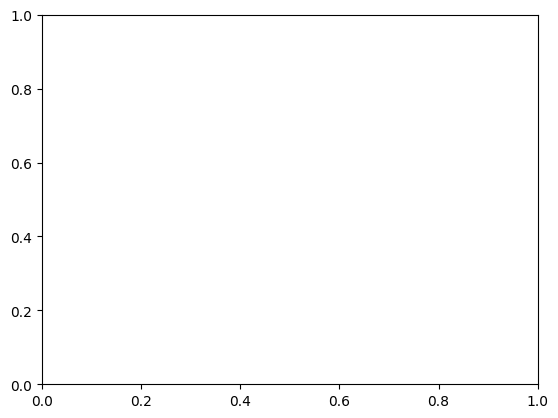

In [14]:
df.plot.scatter(labelled_df["highest year of education"], labelled_df["ever been physically forced to perform sexual acts respondent didn't want to"])

In [25]:
def plot_line_chart(x, y, title='Domestic Abuse Index as a function of Education', x_label='Years of Education', y_label='Domestic Abuse Index'):
    curdoc().theme = 'dark_minimal'

    p = figure(width=800, height=600, title=title)
    p.line(x, y, line_width=2, line_color='cyan')

    p.xaxis.axis_label = x_label
    p.yaxis.axis_label = y_label
    p.grid.visible = True

    p.add_tools(PanTool(), BoxZoomTool(), WheelZoomTool(), ResetTool())
    show(p)

In [26]:
means = pd.DataFrame([.1989241,
.2016616,
.1954545,
.1782497,
.1915598,
.1722841,
.1788509,
.1889748,
.1525253,
.1530638,
.1618362,
.1464452,
.1344781,
.1284893,
.1388591,
.1142972,
.1412377,
.0997227,
.1289557,
.1085714,
.1352941])

In [27]:
plot_line_chart(np.arange(len(means)), means)